# 1. Import Dependencies

In [1]:
import pandas as pd # Import pandas
from prophet import Prophet
from scipy.stats import norm


C:\Users\prami\AppData\Local\Temp\ipykernel_4592\4137083882.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # Import pandas
c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


# 2. Load Data

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,Date,Profit
0,20180101,192261.83
1,20180102,191792.06
2,20180103,191050.39
3,20180104,182901.99
4,20180105,166187.94


In [4]:
df.dtypes

Date        int64
Profit    float64
dtype: object

# 3. Apply Data Preprocessing

In [6]:
profit_data = df['Profit']

# Calculate mean and standard deviation
mean_return = profit_data.mean()
std_dev = profit_data.std()

# Set confidence level
confidence_level = 0.95

# Find the Z-score
z_score = norm.ppf(confidence_level)

# Calculate Parametric VaR
parametric_var = mean_return - (z_score * std_dev)

print(f"Parametric VaR at {confidence_level * 100}% confidence: {parametric_var}")

Parametric VaR at 95.0% confidence: 45714.8722830554


In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [17]:
frame = df.copy()

In [18]:
frame.columns = ['ds', 'y']

In [19]:
frame.head()

,ds,y
0,2018-01-01,192261.83
1,2018-01-02,191792.06
2,2018-01-03,191050.39
3,2018-01-04,182901.99
4,2018-01-05,166187.94


# 4. Create Time Series Model

In [20]:
m = Prophet(interval_width=0.95) 

In [21]:
training_run = m.fit(frame)

09:36:40 - cmdstanpy - INFO - Chain [1] start processing
09:36:41 - cmdstanpy - INFO - Chain [1] done processing


# 5. Evaluate Model

In [22]:
future = m.make_future_dataframe(periods=20, freq='D')

In [23]:
forecast = m.predict(future)

In [24]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,186988.088003,175458.692691,195384.074441,186988.088003,186988.088003,-2053.693421,-2053.693421,-2053.693421,-2053.693421,-2053.693421,-2053.693421,0.0,0.0,0.0,184934.394582
1,2018-01-02,183061.473641,173706.842764,194418.156687,183061.473641,183061.473641,1257.416782,1257.416782,1257.416782,1257.416782,1257.416782,1257.416782,0.0,0.0,0.0,184318.890423
2,2018-01-03,179134.859278,170663.690507,191011.523328,179134.859278,179134.859278,2154.184885,2154.184885,2154.184885,2154.184885,2154.184885,2154.184885,0.0,0.0,0.0,181289.044163
3,2018-01-04,175208.244917,166885.942967,186173.017860,175208.244917,175208.244917,1491.088545,1491.088545,1491.088545,1491.088545,1491.088545,1491.088545,0.0,0.0,0.0,176699.333462
4,2018-01-05,171281.630556,160216.739906,181189.151367,171281.630556,171281.630556,-815.734459,-815.734459,-815.734459,-815.734459,-815.734459,-815.734459,0.0,0.0,0.0,170465.896097


c:\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


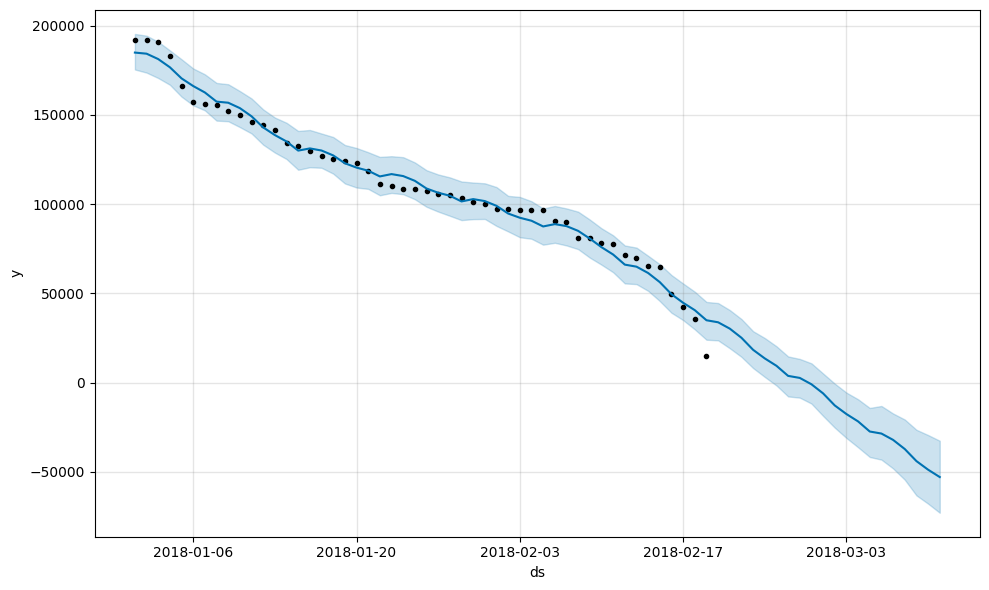

In [28]:
plot1 = m.plot(forecast)

In [30]:
plot1.savefig("Profit pic")

c:\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


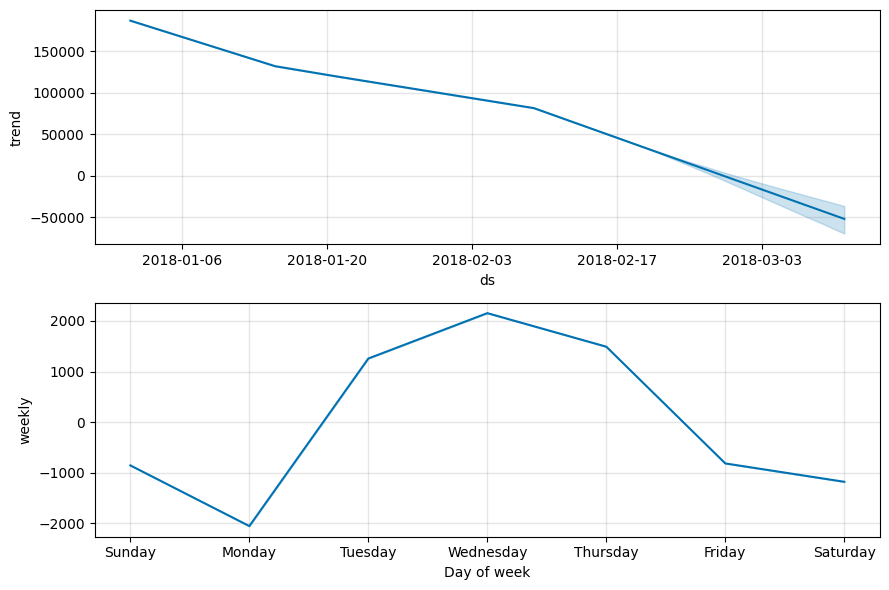

In [26]:
plot2 = m.plot_components(forecast)

# BONUS ROUND - Scaling Up

In [17]:
lines = df['Store/Product'].unique()

In [18]:
df[df['Store/Product']=='SAN_FRANCISCO-TESLA_MODEL_S']

,Date,Store/Product,Value
2160,2018-01-01,SAN_FRANCISCO-TESLA_MODEL_S,2679.400000
2161,2018-01-02,SAN_FRANCISCO-TESLA_MODEL_S,2466.777900
2162,2018-01-03,SAN_FRANCISCO-TESLA_MODEL_S,2562.700000
2163,2018-01-04,SAN_FRANCISCO-TESLA_MODEL_S,2203.600000
2164,2018-01-05,SAN_FRANCISCO-TESLA_MODEL_S,2441.000000
...,...,...,...
3235,2020-12-12,SAN_FRANCISCO-TESLA_MODEL_S,2899.835050
3236,2020-12-13,SAN_FRANCISCO-TESLA_MODEL_S,2896.835050
3237,2020-12-14,SAN_FRANCISCO-TESLA_MODEL_S,3094.019060
3238,2020-12-15,SAN_FRANCISCO-TESLA_MODEL_S,2492.132196


In [19]:
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    print(frame.tail())

           Date              Store/Product        Value
1075 2020-12-12  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1076 2020-12-13  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1077 2020-12-14  LOS_ANGELES-TESLA_MODEL_X  3383.354511
1078 2020-12-15  LOS_ANGELES-TESLA_MODEL_X  2714.591329
1079 2020-12-16  LOS_ANGELES-TESLA_MODEL_X  2585.035107
           Date              Store/Product        Value
2155 2020-12-12  LOS_ANGELES-TESLA_MODEL_S  3501.353950
2156 2020-12-13  LOS_ANGELES-TESLA_MODEL_S  3505.353950
2157 2020-12-14  LOS_ANGELES-TESLA_MODEL_S  3751.689962
2158 2020-12-15  LOS_ANGELES-TESLA_MODEL_S  3008.050462
2159 2020-12-16  LOS_ANGELES-TESLA_MODEL_S  2866.538618
           Date                Store/Product        Value
3235 2020-12-12  SAN_FRANCISCO-TESLA_MODEL_S  2899.835050
3236 2020-12-13  SAN_FRANCISCO-TESLA_MODEL_S  2896.835050
3237 2020-12-14  SAN_FRANCISCO-TESLA_MODEL_S  3094.019060
3238 2020-12-15  SAN_FRANCISCO-TESLA_MODEL_S  2492.132196
3239 2020-12-16  SAN_FRANCISCO-TESLA_M

In [20]:
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

In [21]:
fit_models = {}
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    frame.drop('Store/Product', axis=1, inplace=True)
    frame.columns = ['ds', 'y']
    
    m = Prophet(interval_width=0.95)
    model = m.fit(frame)
    
    fit_models[stock_line] = m 

08:42:56 - cmdstanpy - INFO - Chain [1] start processing
08:42:56 - cmdstanpy - INFO - Chain [1] done processing
08:42:57 - cmdstanpy - INFO - Chain [1] start processing
08:42:57 - cmdstanpy - INFO - Chain [1] done processing
08:42:57 - cmdstanpy - INFO - Chain [1] start processing
08:42:57 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
fit_models

{'LOS_ANGELES-TESLA_MODEL_X': <prophet.forecaster.Prophet at 0x2395042dc70>,
 'LOS_ANGELES-TESLA_MODEL_S': <prophet.forecaster.Prophet at 0x239501d9e80>,
 'SAN_FRANCISCO-TESLA_MODEL_S': <prophet.forecaster.Prophet at 0x239524a04d0>}

In [23]:
forward = fit_models['LOS_ANGELES-TESLA_MODEL_S'].make_future_dataframe(200)
forecast = fit_models['LOS_ANGELES-TESLA_MODEL_S'].predict(forward)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3884.323862,1004.042199,4245.354944,3884.323862,3884.323862,-1220.485729,-1220.485729,-1220.485729,18.334198,18.334198,18.334198,-1238.819927,-1238.819927,-1238.819927,0.0,0.0,0.0,2663.838133
1,2018-01-02,3885.153272,948.660742,4442.341275,3885.153272,3885.153272,-1231.651966,-1231.651966,-1231.651966,-12.211041,-12.211041,-12.211041,-1219.440925,-1219.440925,-1219.440925,0.0,0.0,0.0,2653.501305
2,2018-01-03,3885.982682,828.268327,4318.937338,3885.982682,3885.982682,-1203.469470,-1203.469470,-1203.469470,-4.710806,-4.710806,-4.710806,-1198.758664,-1198.758664,-1198.758664,0.0,0.0,0.0,2682.513212
3,2018-01-04,3886.812092,947.318744,4472.868860,3886.812092,3886.812092,-1152.207848,-1152.207848,-1152.207848,24.647268,24.647268,24.647268,-1176.855117,-1176.855117,-1176.855117,0.0,0.0,0.0,2734.604244
4,2018-01-05,3887.641502,956.896905,4381.673170,3887.641502,3887.641502,-1192.205641,-1192.205641,-1192.205641,-38.335288,-38.335288,-38.335288,-1153.870353,-1153.870353,-1153.870353,0.0,0.0,0.0,2695.435860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2021-06-30,5317.640273,4824.223512,8338.947587,5306.872961,5328.328089,1273.346524,1273.346524,1273.346524,-4.710806,-4.710806,-4.710806,1278.057330,1278.057330,1278.057330,0.0,0.0,0.0,6590.986797
1276,2021-07-01,5318.822114,4893.907330,8292.385749,5307.968699,5329.576838,1295.204704,1295.204704,1295.204704,24.647268,24.647268,24.647268,1270.557435,1270.557435,1270.557435,0.0,0.0,0.0,6614.026817
1277,2021-07-02,5320.003955,4790.050703,8400.011920,5309.093568,5330.825587,1226.538521,1226.538521,1226.538521,-38.335288,-38.335288,-38.335288,1264.873809,1264.873809,1264.873809,0.0,0.0,0.0,6546.542476
1278,2021-07-03,5321.185796,5015.777933,8338.949947,5310.236070,5332.072754,1246.221588,1246.221588,1246.221588,-15.031535,-15.031535,-15.031535,1261.253124,1261.253124,1261.253124,0.0,0.0,0.0,6567.407384
